# **STC: User Behavior Analysis and Research**



---------------------------------------------------------------------------------------

##**❇ Objective:**


*   **Identifying Appropriate Methods for Classifying and Analyzing Viewer Categories Based on Program Class: Movie or Series.**
*   **Analyze different user viewing patterns and identify the segment that watches STC tv in standard definition (SD) versus the segment that watches in high definition (HD).**



##**❇ Jawwy Dataset**
**The dataset consists of meta details about the movies and tv shows as genre.
Also details about Users activities, spent duration and if watching in High definition or standard definition. You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.**

---------------------------------------------------------------------------------------

### **Import the required libraries**


In [1]:
!pip install pyxlsb

In [2]:
import pyxlsb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline
#plotting and to set the default figure size, respectively.

In [3]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load the Dataset / **Explor the Dataset****

In [4]:
df = pd.read_excel("/content/drive/My Drive/STC/stc TV Data Set_T1.xlsb", engine='pyxlsb')
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  int64 
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.0+ MB


(1048575, 13)

In [6]:
df.dtypes

Column1              int64
date_                int64
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_desc        object
program_genre       object
series_title         int64
hd                   int64
original_name       object
dtype: object

In [7]:
df.columns

Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [8]:
#numerical variables
num = list(df.select_dtypes(include=['int64']).keys())
print(num)

['Column1', 'date_', 'user_id_maped', 'duration_seconds', 'season', 'episode', 'series_title', 'hd']


In [9]:
#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)

['program_name', 'program_class', 'program_desc', 'program_genre', 'original_name']


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,1048575.0,628172.999996,359704.056673,1.0,318066.0,630355.0,939822.5,1247852.0
date_,1048575.0,43012.016208,124.283352,42808.0,42896.0,43022.0,43121.0,43220.0
user_id_maped,1048575.0,17092.655895,10035.130858,1.0,8253.0,17149.0,25665.0,34280.0
duration_seconds,1048575.0,1230.957212,6821.057889,2.0,52.0,119.0,1328.0,1461329.0
season,1048575.0,1.342139,2.104095,0.0,0.0,1.0,1.0,23.0
episode,1048575.0,6.157952,12.220155,0.0,0.0,1.0,9.0,282.0
series_title,1048575.0,0.012059,0.109150,0.0,0.0,0.0,0.0,1.0
hd,1048575.0,0.386273,0.486895,0.0,0.0,0.0,1.0,1.0


In [11]:
object_describe = df.describe(include='object').T
object_describe

,count,unique,top,freq
program_name,1048575,8270,The Boss Baby,23625
program_class,1048575,2,SERIES/EPISODES,560174
program_desc,1034537,11176,Animation MovieThe Boss Baby (HD),23625
program_genre,1048575,16,Animation,401730
original_name,1048575,1795,Friends,32997


### **Summary:**
- The dataset contains 13 columns and 1,048,575 rows. The provided columns are divided into numerical data and categorical data.
- column1 seems to primarily function as an index and doesn't offer any meaningful content.Therefore, we can consider removing it.
- Based on the dataset, animation appears to be the most popular genre.



###**Exploratory Data Analysis (EDA)**

In [12]:
df.apply(pd.Series.nunique)

Column1             1048575
date_                   411
user_id_maped         11578
program_name           8270
duration_seconds      18958
program_class             2
season                   22
episode                 281
program_desc          11176
program_genre            16
series_title              2
hd                        2
original_name          1795
dtype: int64

In [13]:
#is there any dupilacted values?
if df.duplicated().any():
    print("yes")
else:
    print("No")

No


In [14]:
#is there any missing values?
if df.isnull().sum().any():
 print("yes")
else:
    print("No")

yes


In [15]:
#Number of null values for each column
df.isnull().sum()

Column1                 0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64

In [16]:
#I need to determine the percentage of missing values in my data to decide whether dropping those features or imputing them
missingValues_Percentage= df.isnull().sum()*100/len(df)
missingValues_Percentage

Column1             0.000000
date_               0.000000
user_id_maped       0.000000
program_name        0.000000
duration_seconds    0.000000
program_class       0.000000
season              0.000000
episode             0.000000
program_desc        1.338769
program_genre       0.000000
series_title        0.000000
hd                  0.000000
original_name       0.000000
dtype: float64



```
Given the low percentage of missing values (1.34%), dropping them is unlikely to significantly impact the data's integrity."
```



### **Data Preprocessing**

In [17]:
#drop the NaN values
df.dropna(inplace=True)  # This will drop rows with any NaN values

In [18]:
#checking
#is there any missing values?
df.isnull().sum().any()

False

In [19]:
df.shape

(1034537, 13)

In [20]:
#drop the index col
Column1 = df['Column1']
df.drop('Column1',inplace=True,axis=1)
df.head(1)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets


In [21]:
#remove whitespace characters to avoid misspellings in input data
df['program_name'] = df['program_name'].str.strip()
#converts the 'date_'to datetime format.
df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')
## read numeric columns as numeric data types
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)
# read string columns as string data types
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class',
  'program_desc','program_genre','original_name']].astype(str)

In [22]:
df.head(3)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_seconds,1034537.0,1233.009959,6841.555973,2.0,51.0,119.0,1330.0,1461329.0
season,1034537.0,1.334519,2.100225,0.0,0.0,1.0,1.0,23.0
episode,1034537.0,6.165930,12.261514,0.0,0.0,1.0,9.0,282.0
series_title,1034537.0,0.012223,0.109879,0.0,0.0,0.0,0.0,1.0
hd,1034537.0,0.384282,0.486425,0.0,0.0,0.0,1.0,1.0


### **Task 1: You are required to work on task one to study and HD flag for available dataset.**

In [24]:
#Make a copy of the dataframe for working on task 1
df2=df.copy()

In [26]:
#Here we try to get the most watched movies (Total Views/Total Users Views/Total watch time)
#For series we concatenated the Session episode to differentiate between episodes
grouped=df2.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)

In [27]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [28]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [29]:
# plot top 10 Programs
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [30]:
# Here we try to study the customer experience against Program class
grouped=df2.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)

In [31]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3888,551760,251418.468056
1,MOVIE,11320,482777,102913.316389


In [32]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

# **Extra: Visuallization**

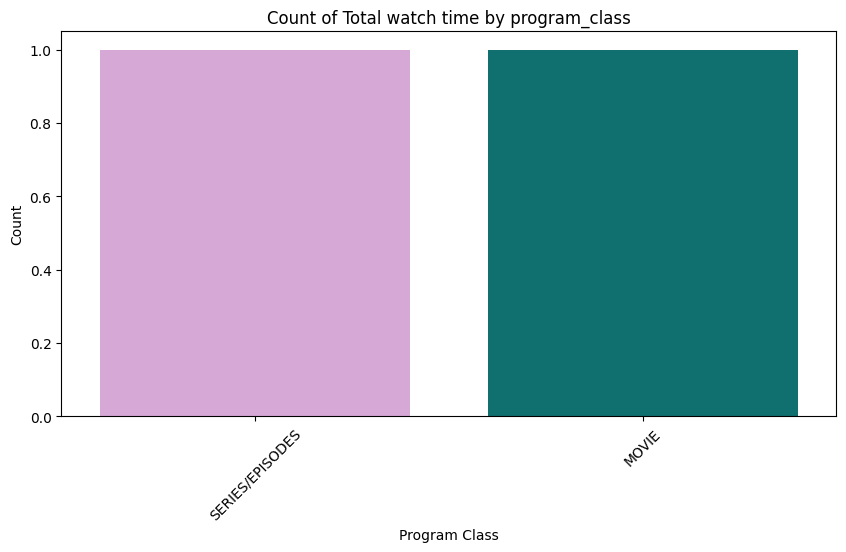

In [35]:
custom_palette = [ "plum", "teal"]

# Countplot for Total watch time in hours
plt.figure(figsize=(10, 5))
sns.countplot(data=grouped, x='program_class', palette=custom_palette)
plt.title('Count of Total watch time by program_class')
plt.xlabel('Program Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

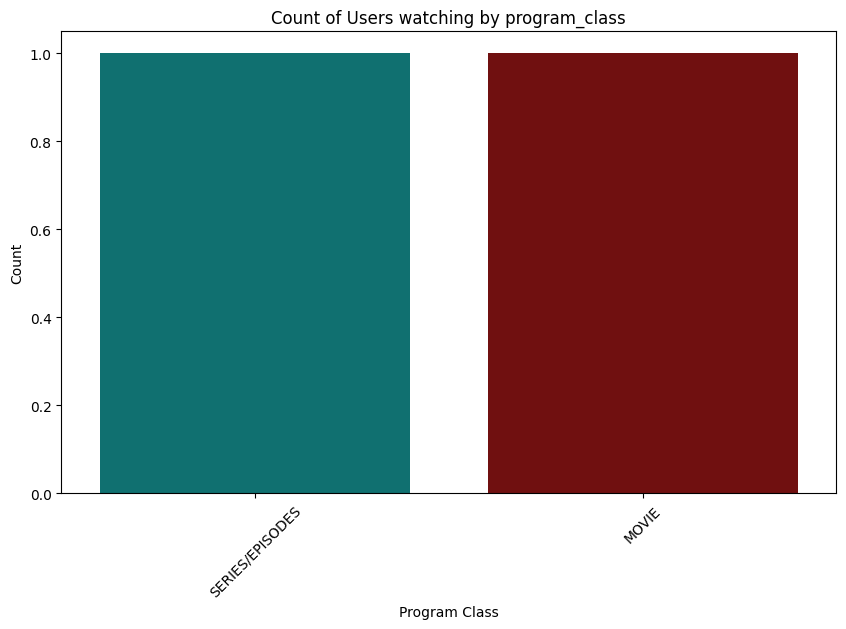

In [36]:
# Countplot for No of Users who Watched
custom_palette = [ "teal", "maroon"]
sns.countplot(data=grouped, x='program_class', palette=custom_palette)
plt.title('Count of Users watching by program_class')
plt.xlabel('Program Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

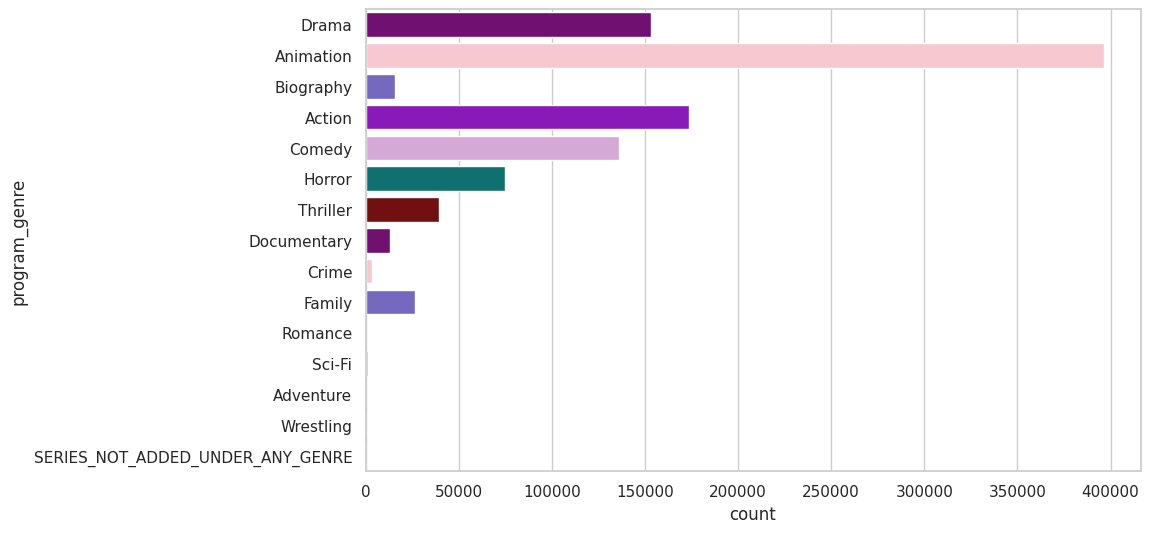

In [40]:
sns.countplot(y="program_genre", data=df, palette=["purple", "pink", "slateblue", "darkviolet", "plum", "teal", "maroon"])
plt.show()